**Exercise 5.11**.  The data file `winnebago` contains monthly unit sales of recreational vehicles (RVs) from Winnebago, Inc.  from November 1966 through February 1972.

**(a)**  Display and interpret the time series plot for these data.

**(b)**  Now take natural logarithms of the monthly sales figures and display the time series plot of the transformed values.  Describe the effect of the logarithms on the behavior of the series.

**(c)**  Calculate the fractional relative changes, $(Y_t - Y_{t-1})/Y_{t-1}$, and compare them with the differences of (natural) logarithms, $\nabla \log Y_t = \log Y_t - \log Y_{t-1}$.  How do they compare for smaller values and larger values?

**Solution**.

**(a)**

In [1]:
require(ggplot2)
require(zoo)
require(latex2exp)
require(Hmisc)

Loading required package: ggplot2

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: latex2exp

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




In [2]:
data <- read.table("../data/winnebago.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1966-11"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

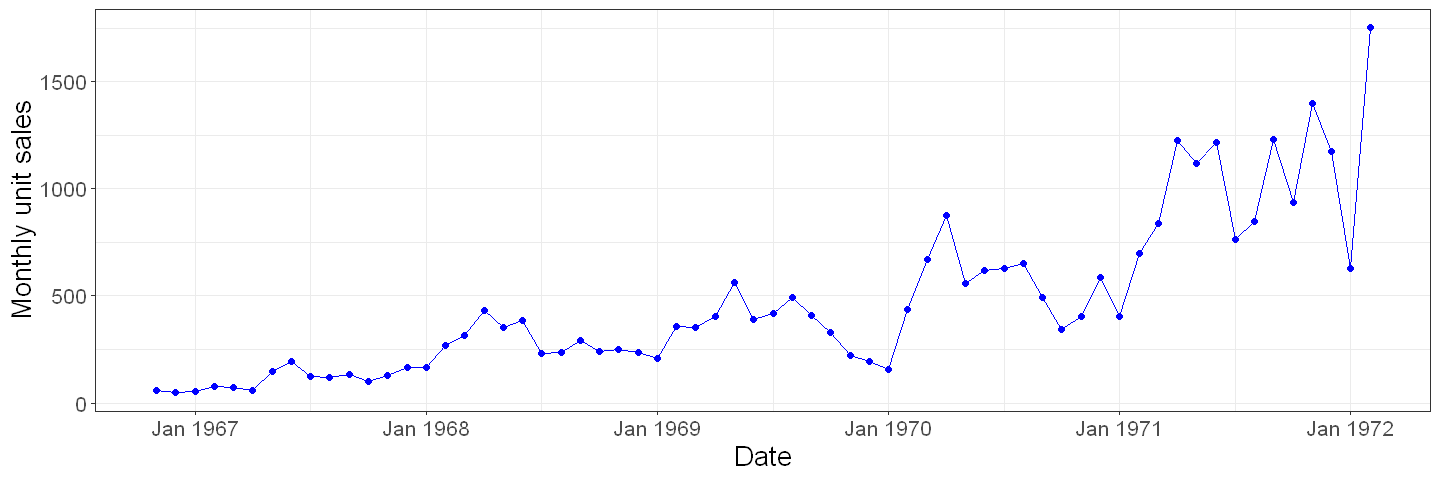

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=date, y=winnebago), color='blue') +
  geom_point(aes(x=date, y=winnebago), color='blue') +
  xlab('Date') + ylab('Monthly unit sales') +
  theme_bw() + theme(text = element_text(size=16))

As in Exercise 3.7, there seems to be oscillations and exponential growth.

**(b)**

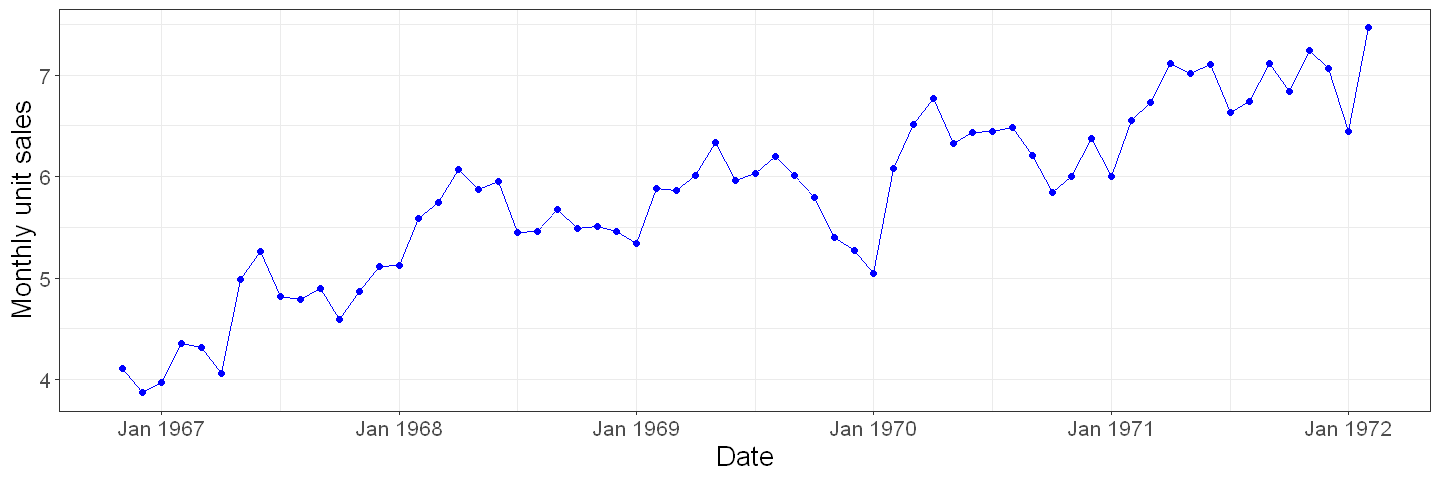

In [4]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=date, y=log(winnebago)), color='blue') +
  geom_point(aes(x=date, y=log(winnebago)), color='blue') +
  xlab('Date') + ylab('Monthly unit sales') +
  theme_bw() + theme(text = element_text(size=16))

As in Exercise 3.7, taking natural logarithms seems to transform the apparent exponential growth into linear growth.

**(c)**

In [5]:
y = data[['winnebago']]
original_returns = ((Lag(y) - y) / y)[2:length(y)]
log_returns = (log(Lag(y)) - log(y))[2:length(y)]

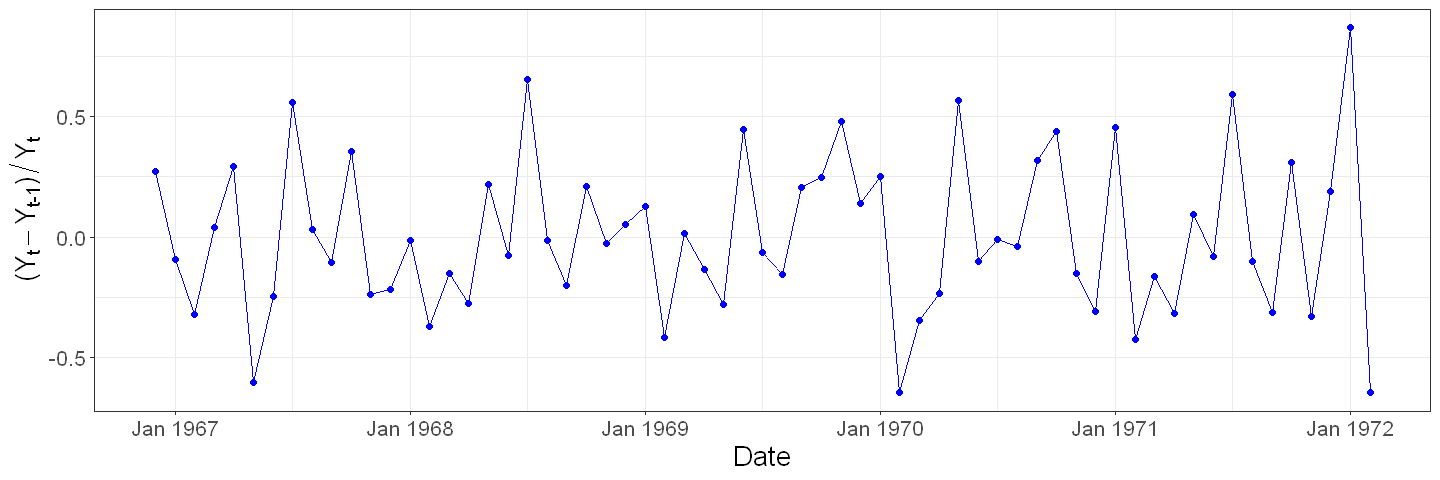

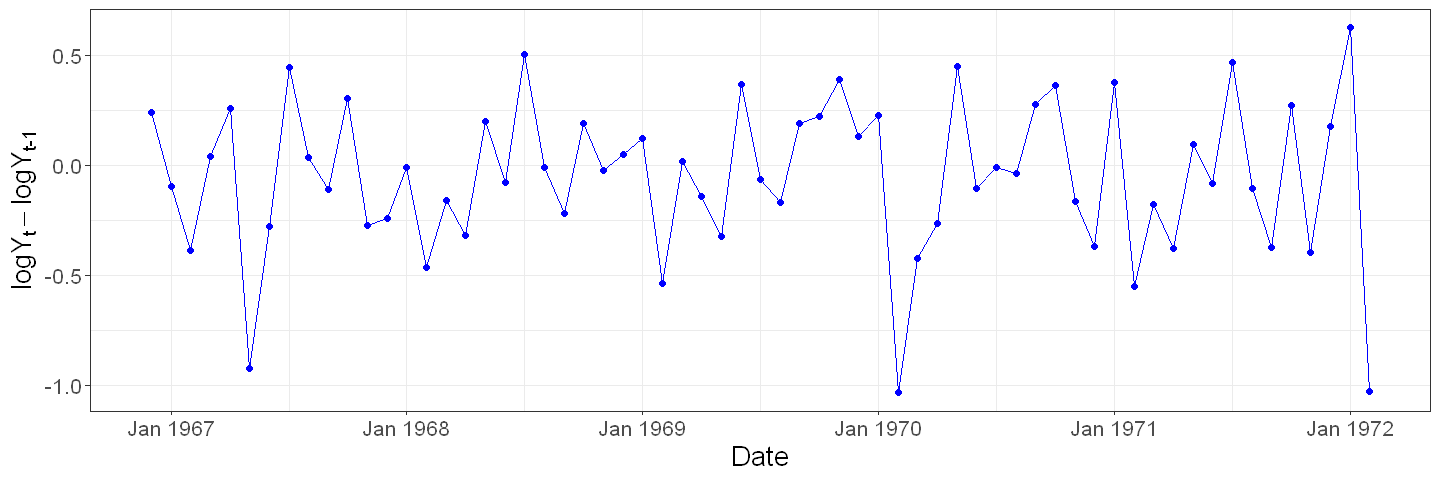

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=data[['date']][2:nrow(data)], y=original_returns), color='blue') +
  geom_point(aes(x=data[['date']][2:nrow(data)], y=original_returns), color='blue') +
  xlab('Date') + ylab(TeX('$(Y_t - Y_{t-1}) / Y_t$')) +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x=data[['date']][2:nrow(data)], y=log_returns), color='blue') +
  geom_point(aes(x=data[['date']][2:nrow(data)], y=log_returns), color='blue') +
  xlab('Date') + ylab(TeX('$\\log Y_t - \\log Y_{t-1}$')) +
  theme_bw() + theme(text = element_text(size=16))

It is understandably difficult to tell these apart visually -- since the series are related by

$$ A_t = \frac{Y_t - Y_{t-1}}{Y_{t-1}} = \frac{Y_t}{Y_{t-1}} - 1 = \exp \{ \log Y_t - \log Y_{t-1} \} - 1 = \exp B_t - 1 $$ 

and the values are in (-1, 1).  The larger differences are magnified in the linear series $A_t$, though, compared to the log return series $B_t$.

**Exercise 5.12**.  The data file `SP` contains quarterly Standard & Poor's Composite Index stock price values from the first quarter of 1936 through the fourth quarter of 1977.

**(a)**  Display and interpret the time series plot for these data.

**(b)**  Now take natural logarithms of the quarterly values and display the time series plot of the transformed values.  Describe the effect of the logarithms on the behavior of the series.

**(c)**  Calculate the (fractional) relative changes, $(Y_t - Y_{t-1})/Y_{t-1}$, and compare them with the differences of (natural) logarithms, $\nabla \log Y_t = \log Y_t - \log Y_{t-1}$.  How do they compare for smaller values and larger values?

**Solution**.

**(a)**

In [7]:
data <- read.table("../data/SP.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1936-03"), freq = 4))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

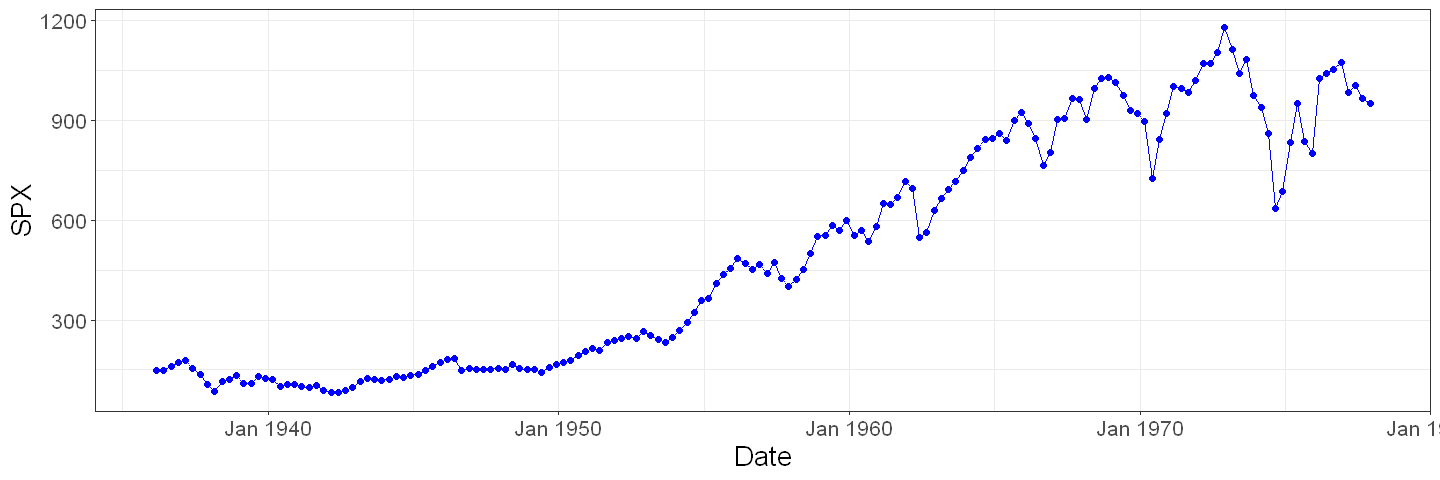

In [8]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=date, y=SP), color='blue') +
  geom_point(aes(x=date, y=SP), color='blue') +
  xlab('Date') + ylab('SPX') +
  theme_bw() + theme(text = element_text(size=16))

There seems to be oscillations and exponential growth.

**(b)**

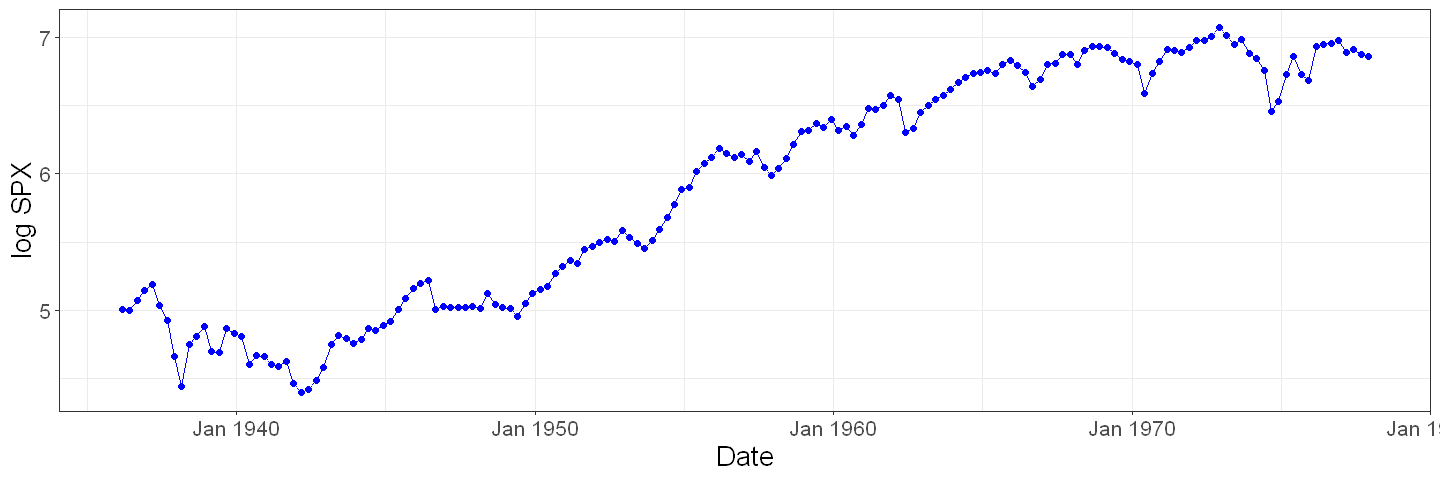

In [9]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=date, y=log(SP)), color='blue') +
  geom_point(aes(x=date, y=log(SP)), color='blue') +
  xlab('Date') + ylab('log SPX') +
  theme_bw() + theme(text = element_text(size=16))

Natural logarithms appear to transform exponential growth into linear growth.

**(c)**

In [10]:
y = data[['SP']]
original_returns = ((Lag(y) - y) / y)[2:length(y)]
log_returns = (log(Lag(y)) - log(y))[2:length(y)]

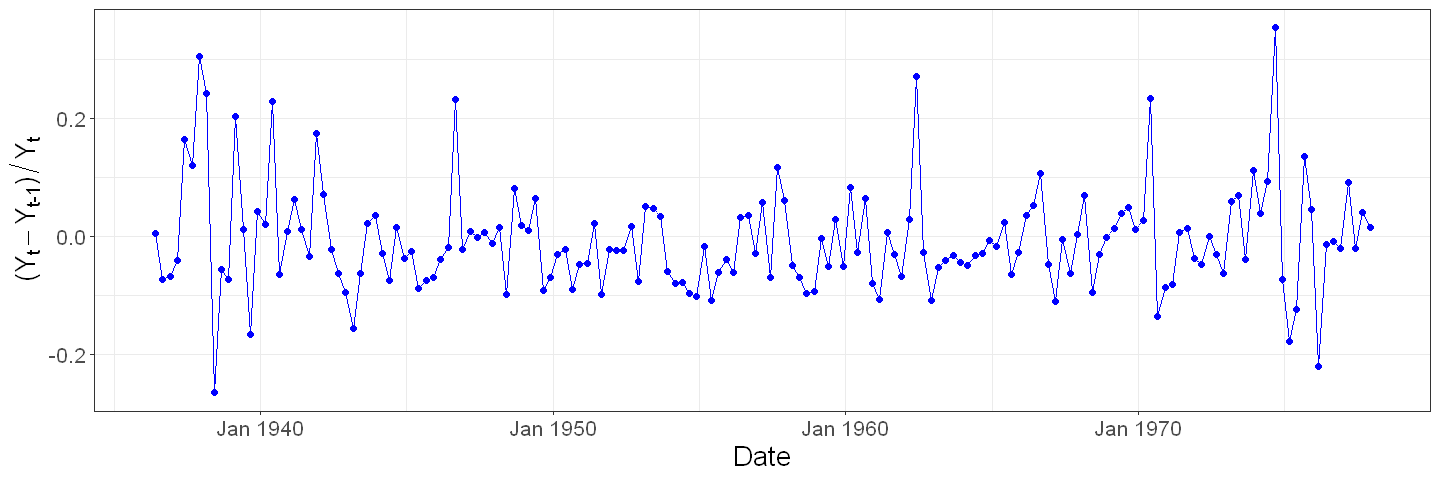

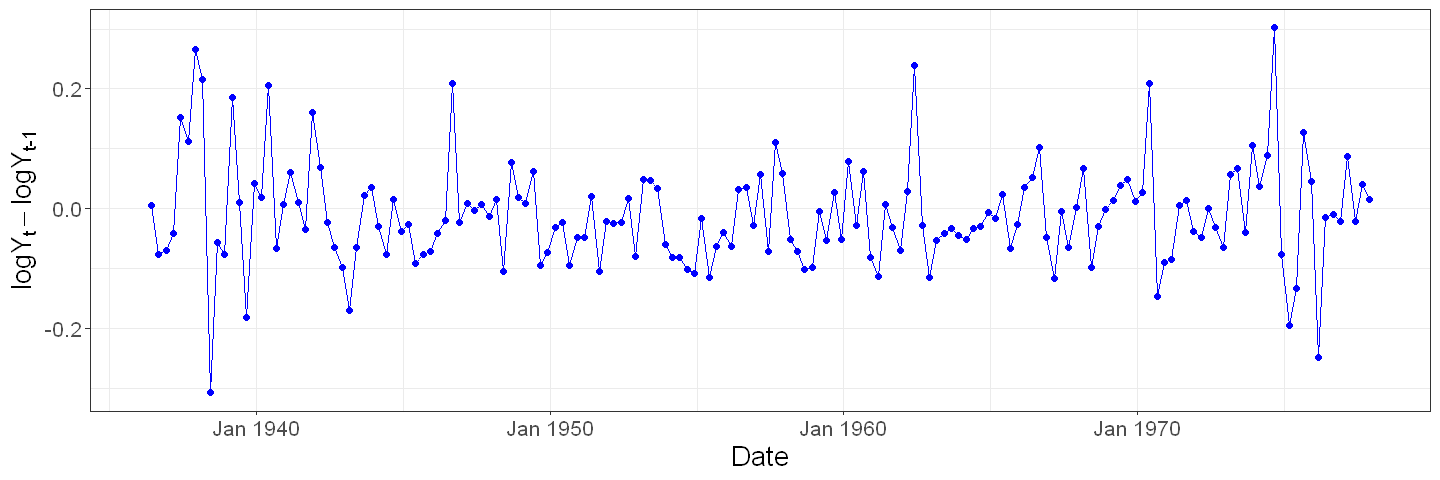

In [11]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=data[['date']][2:nrow(data)], y=original_returns), color='blue') +
  geom_point(aes(x=data[['date']][2:nrow(data)], y=original_returns), color='blue') +
  xlab('Date') + ylab(TeX('$(Y_t - Y_{t-1}) / Y_t$')) +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x=data[['date']][2:nrow(data)], y=log_returns), color='blue') +
  geom_point(aes(x=data[['date']][2:nrow(data)], y=log_returns), color='blue') +
  xlab('Date') + ylab(TeX('$\\log Y_t - \\log Y_{t-1}$')) +
  theme_bw() + theme(text = element_text(size=16))

As before, it is understandably difficult to tell these apart visually -- since the series are related by

$$ A_t = \frac{Y_t - Y_{t-1}}{Y_{t-1}} = \frac{Y_t}{Y_{t-1}} - 1 = \exp \{ \log Y_t - \log Y_{t-1} \} - 1 = \exp B_t - 1 $$ 

and the values are in (-1, 1).  The larger differences are magnified in the linear series $A_t$, though, compared to the log return series $B_t$.

Also of note, both series appear to be heteroskedastic -- the values are "noisier" near the start and the end of the period.

**Exercise 5.13**.  The data file `airpass` contains international airline passenger monthly totals (in thousands) flown from January 1960 through December 1971.  This is a classic time series analyzed in Box and Jenkins (1976).

**(a)**  Display and interpret the time series plot for these data.

**(b)**  Now take natural logarithms of the monthly values and display the time series plot of the transformed values.  Describe the effect of the logarithms on the behavior of the series.

**(c)**  Calculate the (fractional) relative changes, $(Y_t - Y_{t-1})/Y_{t-1}$, and compare them with the differences of (natural) logarithms, $\nabla \log Y_t = \log Y_t - \log Y_{t-1}$.  How do they compare for smaller values and larger values?

**Solution**.

**(a)**

In [12]:
data <- read.table("../data/airpass.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1960-01"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

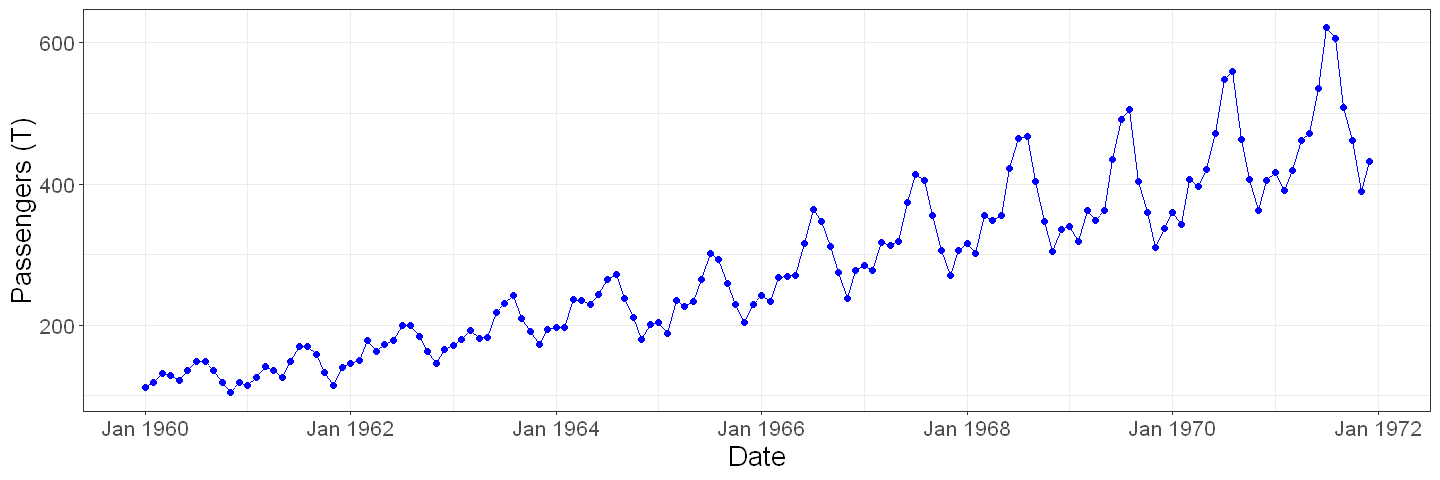

In [13]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=date, y=airpass), color='blue') +
  geom_point(aes(x=date, y=airpass), color='blue') +
  xlab('Date') + ylab('Passengers (T)') +
  theme_bw() + theme(text = element_text(size=16))

The series presents clear exponential growth and a seasonal component.

**(b)**

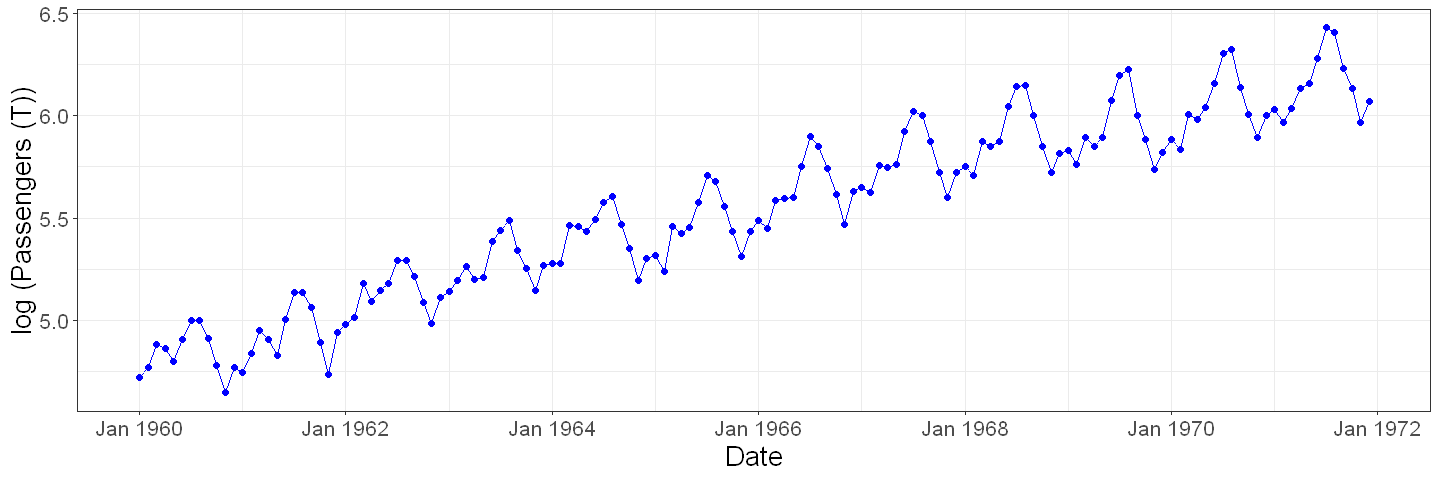

In [14]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=date, y=log(airpass)), color='blue') +
  geom_point(aes(x=date, y=log(airpass)), color='blue') +
  xlab('Date') + ylab('log (Passengers (T))') +
  theme_bw() + theme(text = element_text(size=16))

Growth is now closer to linear; seasonality is still very visible.

**(c)**

In [15]:
y = data[['airpass']]
original_returns = ((Lag(y) - y) / y)[2:length(y)]
log_returns = (log(Lag(y)) - log(y))[2:length(y)]

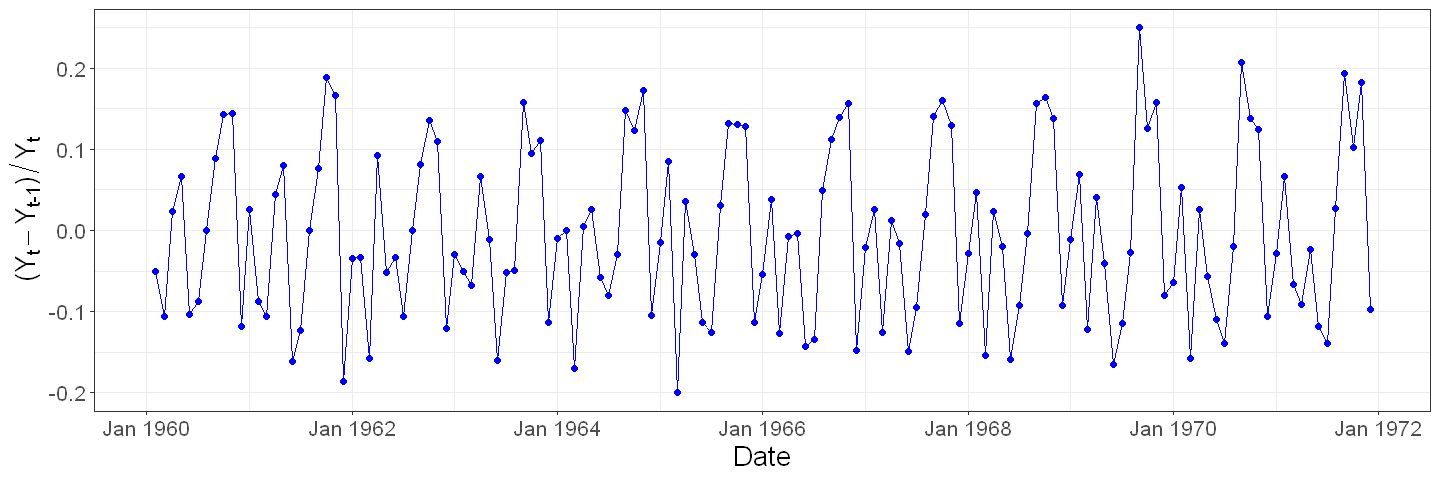

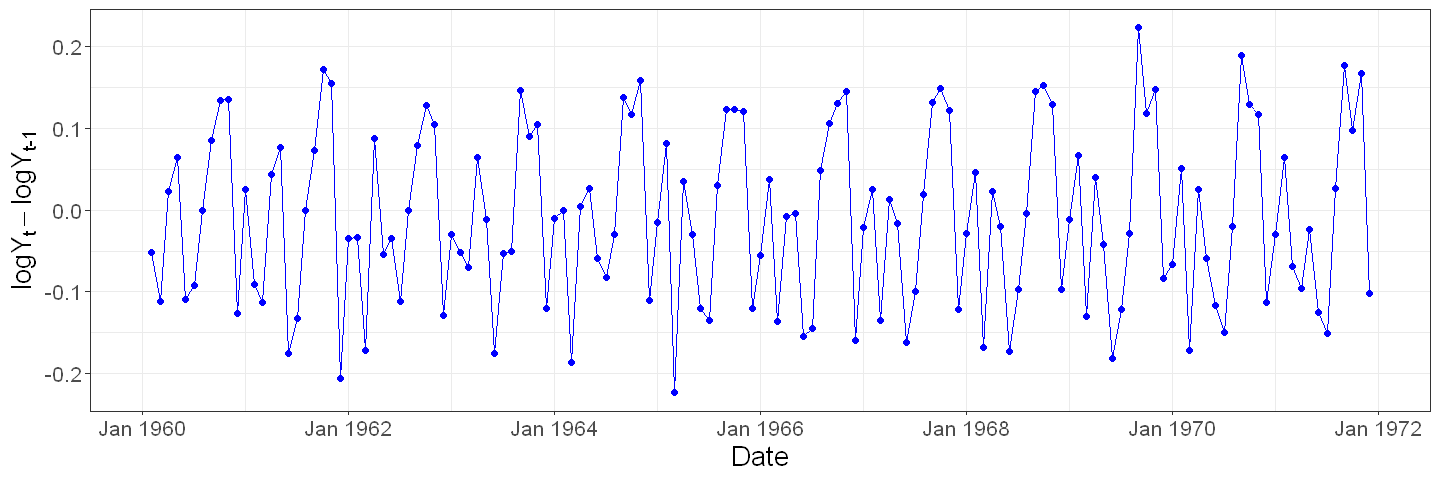

In [16]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x=data[['date']][2:nrow(data)], y=original_returns), color='blue') +
  geom_point(aes(x=data[['date']][2:nrow(data)], y=original_returns), color='blue') +
  xlab('Date') + ylab(TeX('$(Y_t - Y_{t-1}) / Y_t$')) +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x=data[['date']][2:nrow(data)], y=log_returns), color='blue') +
  geom_point(aes(x=data[['date']][2:nrow(data)], y=log_returns), color='blue') +
  xlab('Date') + ylab(TeX('$\\log Y_t - \\log Y_{t-1}$')) +
  theme_bw() + theme(text = element_text(size=16))

As before, it is understandably difficult to tell these apart visually -- since the series are related by

$$ A_t = \frac{Y_t - Y_{t-1}}{Y_{t-1}} = \frac{Y_t}{Y_{t-1}} - 1 = \exp \{ \log Y_t - \log Y_{t-1} \} - 1 = \exp B_t - 1 $$ 

and the values are in (-1, 1).  The larger differences are magnified in the linear series $A_t$, though, compared to the log return series $B_t$.

**Exercise 5.14**.  Consider the annual rainfall data in Los Angeles shown in Exhibit 1.1, on page 2.  The quantile-quantile normal plot of these data, shown in Exhibit 3.17, on page 50, convinced us that the data were not normal.  The data are in the file `larain`.

**(a)**  Use software to produce a plot similar to Exhibit 5.11, on page 102, and determine the "best" value of $\lambda$ for a power transformation of the data.

**(b)**  Display a quantile-quantile plot of the transformed data.  Are they more normal?

**(c)**  Produce a time series of the transformed values.

**(d)**  Use the transformed values to display a plot of $Y_t$ versus $Y_{t-1}$ as in Exhibit 1.2, on page 2.  Should we expect the transformation to change the dependence or lack of dependence in the series?

**Solution**.

**(a)**

In [17]:
data <- read.table("../data/larain.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1878-01"), freq = 1))
data['t'] = as.numeric(format(data[['date']], "%Y"))

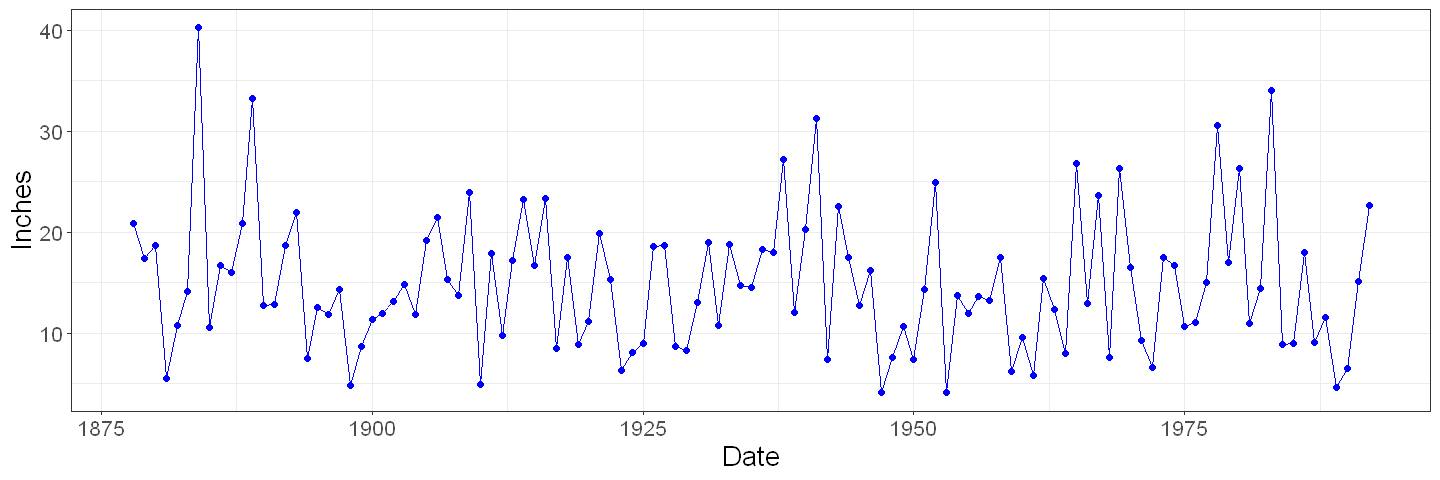

In [18]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=t, y=larain), color='blue') +
  geom_point(aes(x=t, y=larain), color='blue') +
  xlab('Date') + ylab('Inches') +
  theme_bw() + theme(text = element_text(size=16))

In [19]:
require(MASS)

Loading required package: MASS



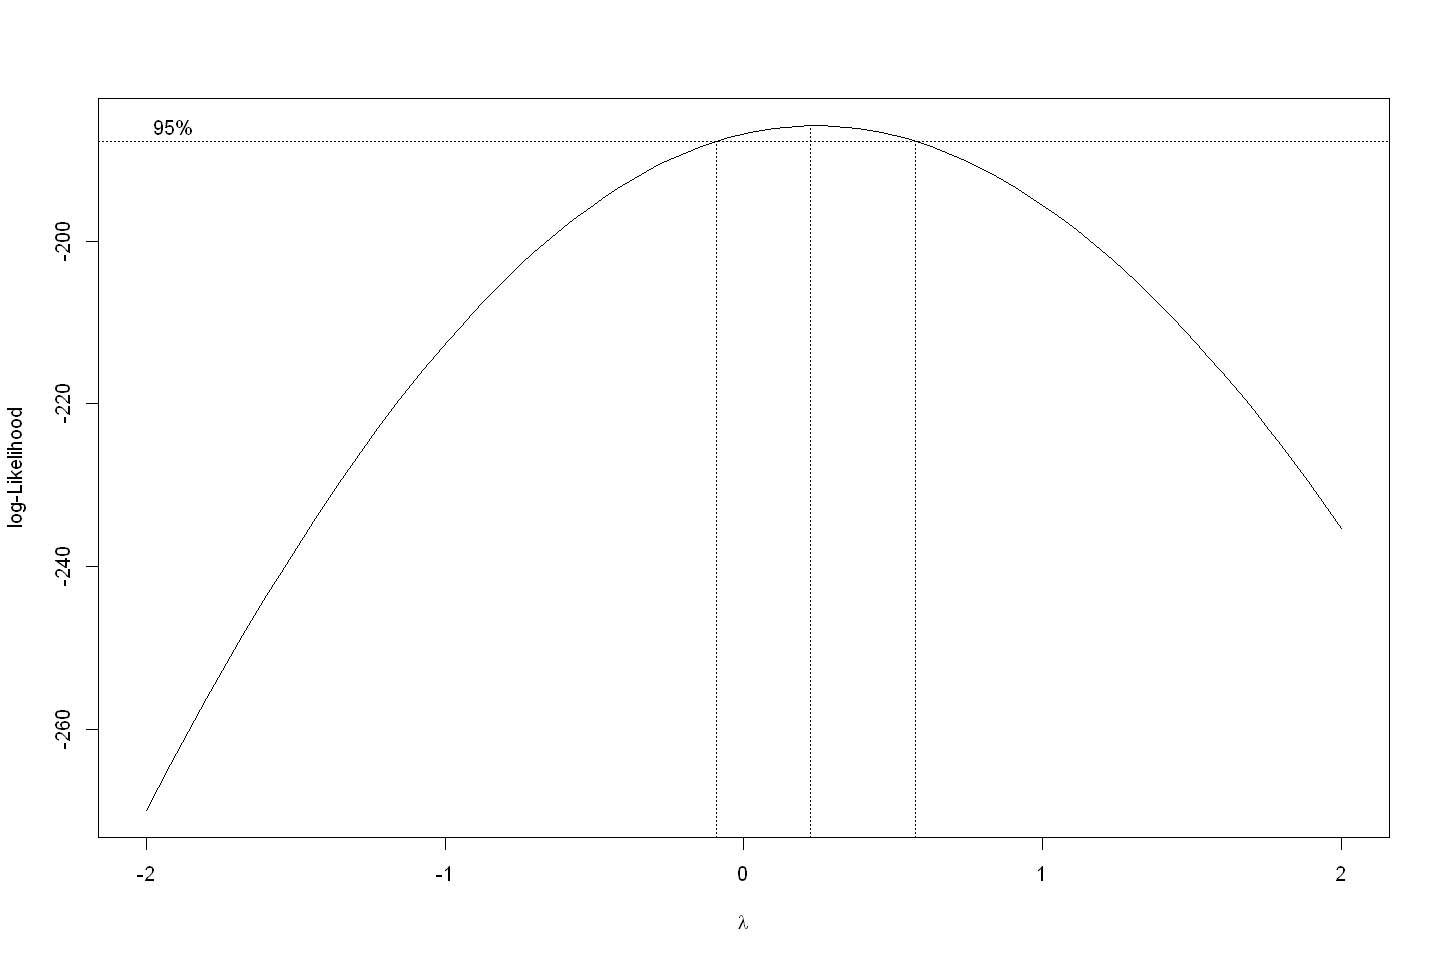

In [20]:
options(repr.plot.width=12, repr.plot.height=8)
bc = boxcox(larain ~ t, data=data)

Note that the value of $\lambda$ that maximizes the probability correlation coefficient is $\lambda \approx 0.25$:

In [21]:
max_lambda = bc$x[bc$y == max(bc$y)]
max_lambda

[1] 0.2222222

In [22]:
transform_boxcox <- function(x, lambda) {
    if (lambda == 0) {
        log(x)
    } else {
        (x**lambda  - 1) / lambda
    }
}

y = data[['larain']]
yt = transform_boxcox(y, 0.25)

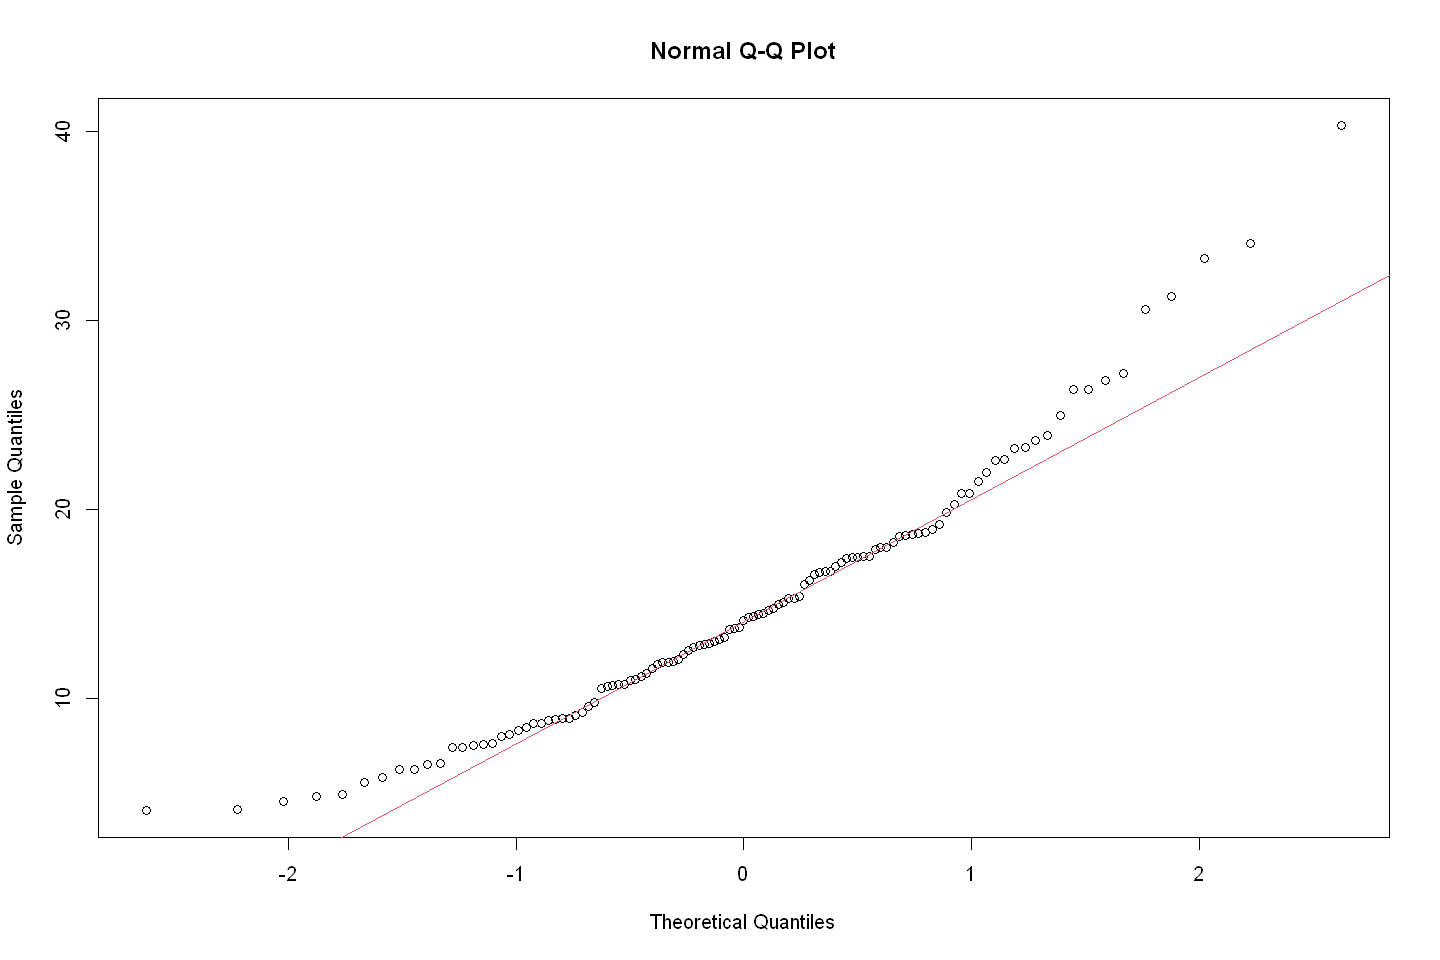

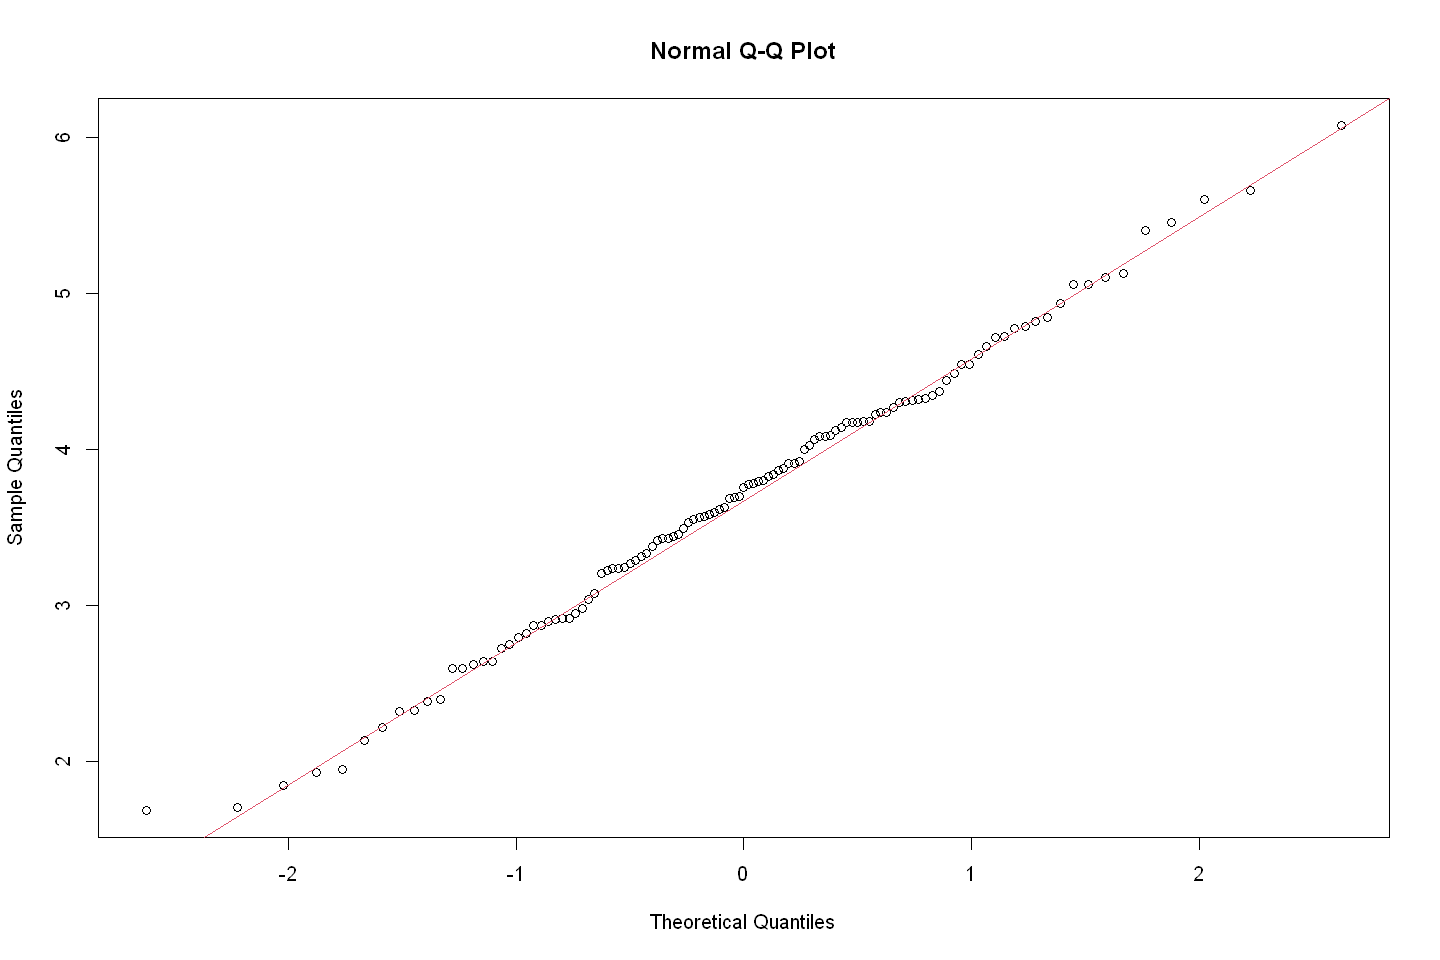

In [23]:
qqnorm(y); qqline(y, col = 2)
qqnorm(yt); qqline(yt, col = 2)

Data is indeed more normal after transformation.

**(c)**

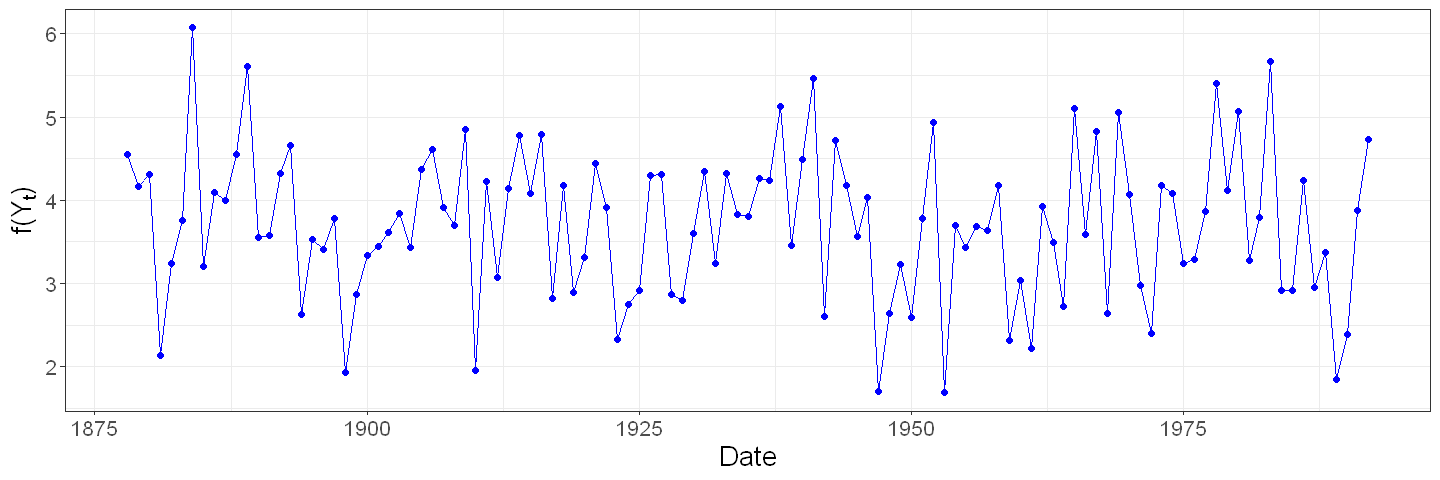

In [24]:
data['larain_t'] = yt

options(repr.plot.width=12, repr.plot.height=4)

ggplot(data) + 
  geom_line(aes(x=t, y=larain_t), color='blue') +
  geom_point(aes(x=t, y=larain_t), color='blue') +
  xlab('Date') + ylab(TeX('$f(Y_t)$')) +
  theme_bw() + theme(text = element_text(size=16))

**(d)**

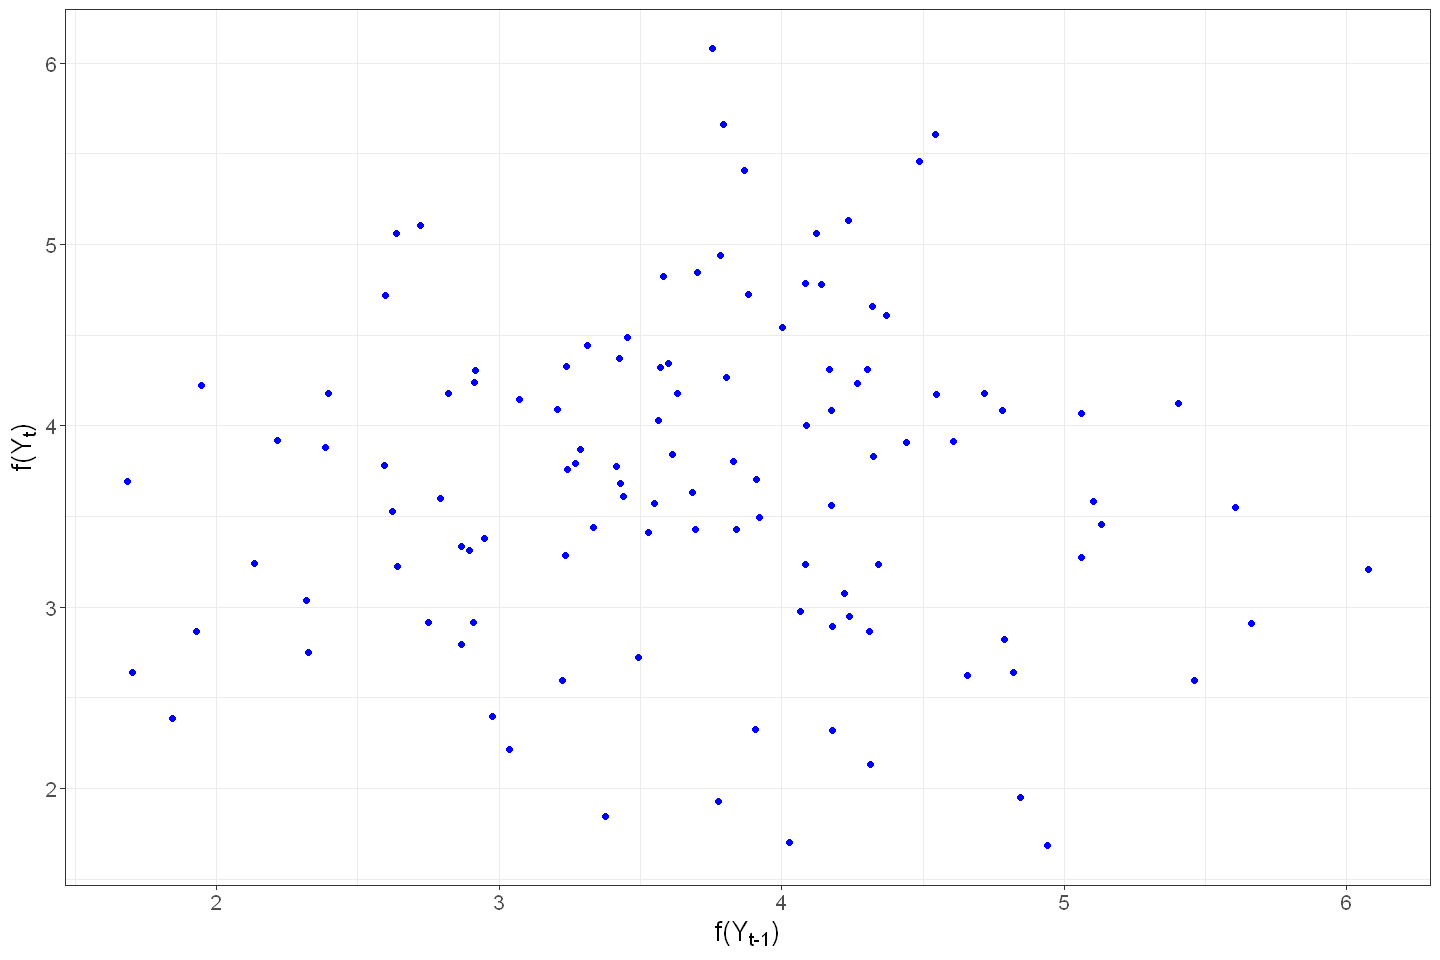

In [25]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(data) + 
  geom_point(aes(x=Lag(larain_t), y=larain_t), color='blue', na.rm=T) +
  xlab(TeX('$f(Y_{t-1})$')) + ylab(TeX('$f(Y_t)$')) +
  theme_bw() + theme(text = element_text(size=16))

While the data is more normally distributed, the relationship between the previous data point and the current data point did not change in an obvious manner.